### Podatkovno rudarjenje, 1. domača naloga, 9. 3. 2018

# Priprava podatkov, osnovne statistike in vizualizacija

**Jaka Jenko**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in prikaz
osnovnih statistik.

### Oddaja
Zapišite kodo in odgovore v spodnje celice. Tako pripravljen notebook shranite v vaš repozitorij za domače naloge na *github*. V učilnici oddajte le povezavo do notebooka v vašem repozitoriju, n.pr.: https://github.com/vašeuporabniškoime/PR18DNvz/dn1/poročilo.ipynb.

Za bolj podrobna navodila, glejte razdelek "Domače naloge" v [spletni učilnici predmeta](https://ucilnica.fri.uni-lj.si/course/view.php?id=37).

## Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**. Podatke naložite iz [spletne učilnice](https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=19230).

Iste podatke boste uporabili v vseh domačih nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5.  
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

In [48]:
import math
import operator
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from csv import DictReader

reader = DictReader(open('ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
moviesRatings = {}

for row in reader:
    if row["movieId"] in moviesRatings:
        moviesRatings[row["movieId"]].append(row)
    else:
        moviesRatings[row["movieId"]] = [row]
        
        
reader = DictReader(open('ml-latest-small/movies.csv', 'rt', encoding='utf-8'))
movies = {}

for row in reader:
    movies[row["movieId"]] = row
    movies[row["movieId"]]["avgRating"] = -1
    movies[row["movieId"]]["specialRating"] = -1
    movies[row["movieId"]]["numOfRatings"] = -1
    
    
reader = DictReader(open('ml-latest-small/cast.csv', 'rt', encoding='utf-8'))
moviesCast = {}

for row in reader:
    moviesCast[row["movieId"]] = row["cast"]

In [49]:
# kodo lahko razdelite v več celic

## Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite po 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

In [50]:
for movieRatingsData in moviesRatings.values():
    avg = 0
    i = 0
    #print(movieRatingsData)
    for rating in movieRatingsData:
        #print(rating["rating"])
        avg += float(rating["rating"])
        i += 1
        
    #movies["avgRating"] = avg / i
    #print(movies[rating["movieId"]]["title"], ": ", movies["avgRating"])
    movies[rating["movieId"]]["avgRating"] = avg/i
    movies[rating["movieId"]]["specialRating"] = avg/math.sqrt(i)
    movies[rating["movieId"]]["numOfRatings"] = i
    
    

print("Prva rešitev:")
top10 = []
for i in range(0, 10):
    maxRating = 0
    for  movie in movies.values():
        #print(max)
        #print(movie)
        if movie not in top10 and (maxRating == 0 or movie["avgRating"] > maxRating["avgRating"]):
            maxRating = movie
    
    top10.append(maxRating)
    print("Naslov: {:55s} Povp. ocena: {:f} Posebna ocena: {:f} Št. ocen: {:d}".format(maxRating["title"], maxRating["avgRating"], maxRating["specialRating"], int(maxRating["numOfRatings"])))


print()
print("Druga rešitev:")

top10 = []
for i in range(0, 10):
    maxRating = 0
    for movie in movies.values():
        #print(max)
        #print(movie)
        if movie not in top10 and (maxRating == 0 or movie["specialRating"] > maxRating["specialRating"]):
            maxRating = movie
    
    top10.append(maxRating)
    print("Naslov: {:55s} Povp. ocena: {:f} Posebna ocena: {:f} Št. ocen: {:d}".format(maxRating["title"], maxRating["avgRating"], maxRating["specialRating"], int(maxRating["numOfRatings"])))

    

Prva rešitev:
Naslov: 10 Attitudes (2001)                                     Povp. ocena: 5.000000 Posebna ocena: 5.000000 Št. ocen: 1
Naslov: Yossi (Ha-Sippur Shel Yossi) (2012)                     Povp. ocena: 5.000000 Posebna ocena: 5.000000 Št. ocen: 1
Naslov: 29th and Gay (2005)                                     Povp. ocena: 5.000000 Posebna ocena: 5.000000 Št. ocen: 1
Naslov: Delirious (2006)                                        Povp. ocena: 5.000000 Posebna ocena: 5.000000 Št. ocen: 1
Naslov: Dancing in September (2000)                             Povp. ocena: 5.000000 Posebna ocena: 5.000000 Št. ocen: 1
Naslov: Through the Olive Trees (Zire darakhatan zeyton) (1994) Povp. ocena: 5.000000 Posebna ocena: 5.000000 Št. ocen: 1
Naslov: Journey, The (El viaje) (1992)                          Povp. ocena: 5.000000 Posebna ocena: 5.000000 Št. ocen: 1
Naslov: Clockstoppers (2002)                                    Povp. ocena: 5.000000 Posebna ocena: 5.000000 Št. ocen: 1
Naslov: Th

Odgovor: **To je slabo, ker je mogoče, da ima kateri izmed filmov le malo ocen. In tako je lahko film, ki je ocenjen z le eno oceno 5, ocenjen enako oz bolje kot film, ki ima veliko več ocen in ima povprečje le malo manjše (recimo 4.99)**

Boljša rešitev: **Pri sami oceni filma, še upoštevamo št. ocen. To sem dosegel tako, da sem seštevek ocen korenil z št. ocen (namesto zgoraj brez korena). Tako dosežem, da več kot je ocen, večji je "bonus". (pri tej enačbi, se skoraj da št. ocen malo preveč upošteva)**


### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Število žanrov:  19



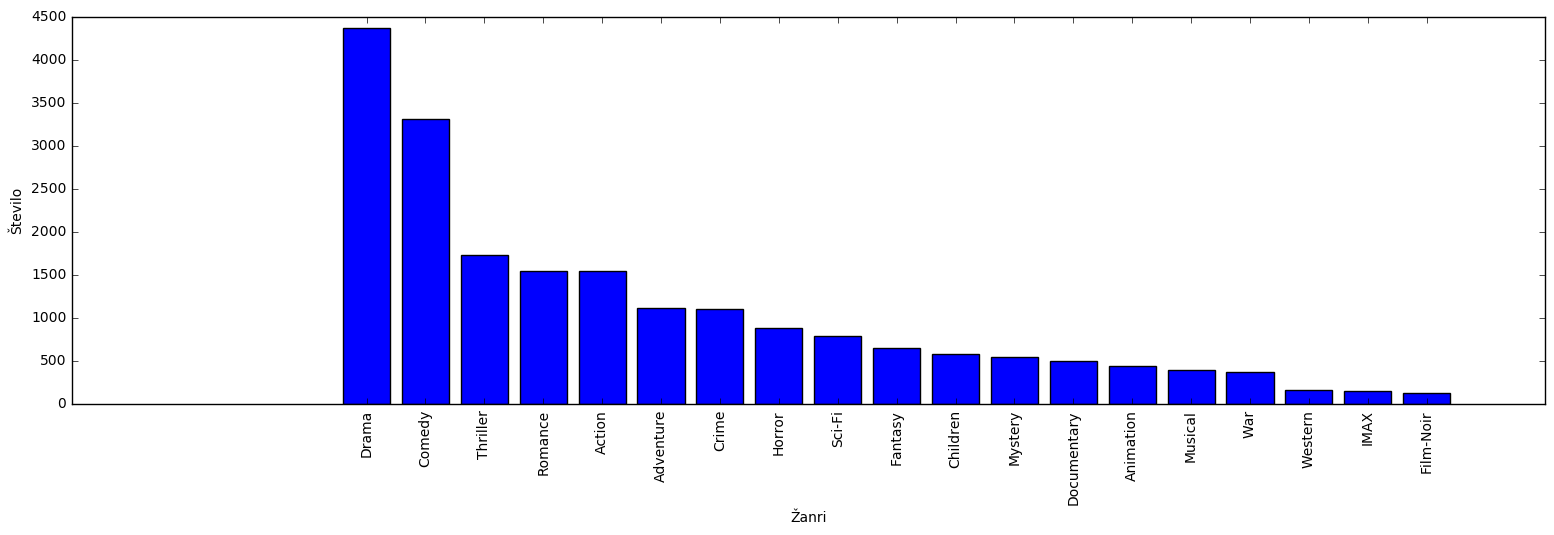

In [51]:
genres = {}

for movie in movies.values():
    #print("asd")
    for movieGenre in movie["genres"].split("|"):
        if movieGenre != "(no genres listed)":
            if movieGenre in genres:
                genres[movieGenre] += 1
            else:
                genres[movieGenre] = 1
            
print("Število žanrov: ", len(genres))
print()

y = []
x = []

for genre in sorted(genres.items(), key=operator.itemgetter(1), reverse=True):
    x.append(genre[0])
    y.append(genre[1])
    
N = len(y)

plt.figure(0, figsize=(N, 5))
plt.bar(range(N), y, align="center", color="blue")
plt.xticks(range(N))
plt.gca().set_xticklabels(x, rotation=90)
plt.xlabel("Žanri")
plt.ylabel("Število")
plt.show()
#plt.imshow(np.array(genresSorted))
    
#plt.figure(figsize=(3, 3))
#plt.bar(range(3), height=(gold_ratio, silv_ratio, bron_ratio), 
#        tick_label=('zlato', 'srebro', 'bron'), 
#        color=(gold_color, silv_color, bron_color))
#plt.ylabel('delež nagradnega sklada');
    

Odgovor: **Vseh žanrov je 19. Največ je filmov žanra "Drama"**

### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

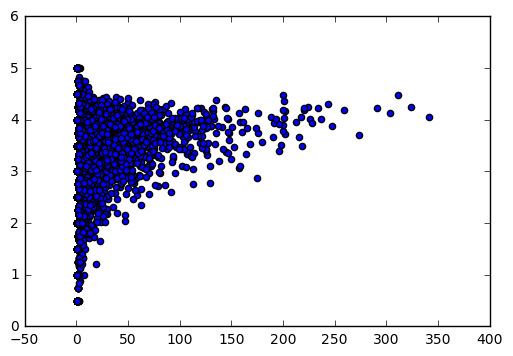

In [52]:
avgRatings = []
numOfRatings = []

for movie in movies.values():
    if movie["avgRating"] != -1:
        avgRatings.append(movie["avgRating"])
        numOfRatings.append(movie["numOfRatings"])

plt.figure(1)
plt.scatter(numOfRatings, avgRatings)
plt.show()

Odgovor: **Za pomoč pri odgovarjanju sem si narisal graf. Iz grafa lahko razberemo, da imajo filmi z večjim št. ocen tudi boljšo povprečno oceno.**

### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

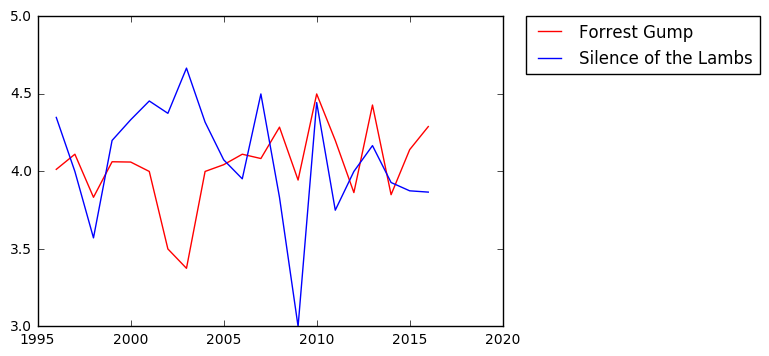

In [53]:
#for movie in movies.values():
    #if movie["numOfRatings"] > 300:
        #print(movie)
        
moviesToCheck = [356, 593]
#Forrest Gump - 356
#Silence of the Lambs - 593

movieRatingsToCheck = [moviesRatings[str(moviesToCheck[0])], moviesRatings[str(moviesToCheck[1])]]

#print(movieRatingsToCheck)
#print(min(int(movieRatingsToCheck[0]["timestamp"])))


moviesRatingsAverageTime = [[], []]
i = 0

for movieRatings in movieRatingsToCheck:
    for movieRating in movieRatings:
        moviesRatingsAverageTime[i].append(movieRating)
        #print(movieRating)
        #print(datetime.fromtimestamp(float(movieRating["timestamp"])).strftime('%Y-%m-%d %H:%M'))
        
    i += 1

    
moviesRatingsAverageTimeYM = [{}, {}]
i = 0
    
for movieRatingsAverageTime in moviesRatingsAverageTime:
    for movieRatingAverageTime in movieRatingsAverageTime:
        date = datetime.fromtimestamp(float(movieRatingAverageTime["timestamp"])).strftime('%Y')
        
        if date in moviesRatingsAverageTimeYM[i]:
            moviesRatingsAverageTimeYM[i][date][0] += float(movieRatingAverageTime["rating"])
            moviesRatingsAverageTimeYM[i][date][1] += 1
        else:
            moviesRatingsAverageTimeYM[i][date] = [float(movieRatingAverageTime["rating"]), 1]
        
    i += 1



y1 = []
x1 = []

for key, movieRatingsAverageTimeYM in sorted(moviesRatingsAverageTimeYM[0].items(), key=operator.itemgetter(0)):
    x1.append(key)
    y1.append(movieRatingsAverageTimeYM[0]/movieRatingsAverageTimeYM[1])


y2 = []
x2 = []

for key, movieRatingsAverageTimeYM in sorted(moviesRatingsAverageTimeYM[1].items(), key=operator.itemgetter(0)):
    x2.append(key)
    y2.append(movieRatingsAverageTimeYM[0]/movieRatingsAverageTimeYM[1])

plt.figure(2)
plt.plot(x1, y1, "r-", label="Forrest Gump")
plt.plot(x2, y2, "b-", label="Silence of the Lambs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#red_patch = mpatches.Patch(color='red', label='The red data')
#red_patch2 = mpatches.Patch(color='red', label='The red data2')
#plt.legend(handles=[red_patch, red_pactch2])
plt.show()

Odgovor: **Izbral sem filma z več ocenami, saj sem tako dobil več podatkov. Ta dva filma sem izbral, ker sem v eni izmed prejšnjih nalog ugotovil, da večina filmov spada pod kategorijo "Drama", in sem želel videti kako se bodo podatki razlikovali za film ki splada v le-to kategorijo in tistega, ki ne.**

### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

In [54]:
actors = {}

#print(moviesCast)

for movieId, cast in moviesCast.items():
    if movieId in list(movies.keys()):
        avgRating = movies[movieId]["avgRating"]
        funct = (avgRating-3)/math.sqrt(1+pow(avgRating-3, 2))
        actorRating = movies[movieId]["specialRating"] * funct
        
        for actor in cast.split("|"):
            if actor != "":
                if actor in actors:
                    actors[actor] += actorRating
                else:
                    actors[actor] = actorRating

i = 1
for actor, ocena in sorted(actors.items(), key=operator.itemgetter(1), reverse=True):#actors.items():
    print(i, actor, ": ", ocena)
    
    i += 1
    if i == 11:
        break


1 Harrison Ford :  494.95517326434435
2 Robert De Niro :  478.79210892662195
3 Tom Hanks :  418.9812796405227
4 Morgan Freeman :  361.2000587014893
5 Brad Pitt :  333.3785718036159
6 Kevin Spacey :  328.60011333085856
7 Matt Damon :  322.37870247998956
8 Bill Murray :  310.1526106740897
9 Al Pacino :  302.7326044627638
10 Robert Duvall :  297.18873758447006


Odgovor: **Igralce sem ocenil tako, da sem iz 1. naloge uporabil izbolšano oceno in jo pomnožil z sigmoidno funkcijo katere vhod je povprečna ocena filma. Tako se izbolšana ocena pomnoži z pozitivno vrednostjo če je povprečna ocena filma več kot 3, z vrednostjo enako 0, če je povp. ocena filma enaka 3 in z negativno vrednostjo, če je ovena filma manjša kot 3.**

### bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **James Bond. Po mojem mnenju je to eden boljših filmov zaradi posebne mešanice akcije, hitrih avtomobilov in  uporabljene tehnologije**

## Zapiski
Za nalaganje podatkov lahko uporabite vgrajen modul `csv`. Mapa s podatki `ml-latest-small` se v tem primeru mora nahajati v isti mapi kot notebook.

In [ ]:
from csv import DictReader

reader = DictReader(open('ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [ ]:
user, movie, rating, timestamp

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [ ]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts